In [ ]:
import pandas as pd
import numpy as np

from datetime import datetime, date, time, timedelta
import calendar as c         # c is the module
c.setfirstweekday(c.SUNDAY)  # first day Sunday America not Monday Euro
cc = c.Calendar()            # cc is the an instantiation of the class Calendar; class Calendar inside module c

from dateutil.relativedelta import *
from dateutil.rrule import *
from dateutil.parser import *
from dateutil import rrule

from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
sns.set(style='darkgrid')

import copy

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
months = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']

#### Read in the data

In [3]:
df = pd.read_csv('../data/df_3.csv')

In [4]:
df['date'] = pd.to_datetime(df['date'])

In [5]:
df.head()

,id,case_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,beat,district,ward,community_area,fbi_code,year,updated_on,latitude,longitude,location,district_x,sector,beat_x,beat_num,district_name,weekday,fri_sat_sun,hour_of_day,summation_bit,first_of_month,first_week_from_first,second_week_from_first,last_week_from_end,second_to last_week_from_end,month,year_month
0,8926266,HV598372,2012-11-15 00:01:00,013XX W CORNELIA AVE,0810,THEFT,OVER $500,APARTMENT,False,False,1924,19.0,44.0,6.0,06,2012,02/10/2018 03:50:01 PM,41.945267,-87.662672,"(41.945267201, -87.662671562)",19.0,2.0,2.0,1924.0,Town Hall,Thursday,0,0,1,0,0,0,0,0,2012-11-15 00:01:00,2012-11
1,8888158,HV562478,2012-11-15 00:01:00,122XX S PRINCETON AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,523,5.0,34.0,53.0,14,2012,02/10/2018 03:50:01 PM,41.671987,-87.629693,"(41.67198685, -87.629693199)",5.0,2.0,2.0,523.0,Calumet,Thursday,0,0,1,0,0,0,0,0,2012-11-15 00:01:00,2012-11
2,8888176,HV562494,2012-11-15 00:01:00,012XX N PULASKI RD,0460,BATTERY,SIMPLE,SIDEWALK,False,False,2534,25.0,27.0,23.0,08B,2012,02/10/2018 03:50:01 PM,41.902899,-87.726309,"(41.902899152, -87.72630861)",25.0,3.0,3.0,2534.0,Grand Central,Thursday,0,0,1,0,0,0,0,0,2012-11-15 00:01:00,2012-11
3,8888888,HV562741,2012-11-15 00:01:00,075XX S EAST END AVE,0620,BURGLARY,UNLAWFUL ENTRY,RESIDENCE,False,False,414,4.0,8.0,43.0,05,2012,02/10/2018 03:50:01 PM,41.757948,-87.583465,"(41.757948437, -87.583465182)",4.0,1.0,1.0,414.0,South Chicago,Thursday,0,0,1,0,0,0,0,0,2012-11-15 00:01:00,2012-11
4,8888795,HV562880,2012-11-15 00:01:00,036XX W HURON ST,0890,THEFT,FROM BUILDING,RESIDENCE,False,False,1112,11.0,27.0,23.0,06,2012,02/10/2018 03:50:01 PM,41.893607,-87.718026,"(41.893606982, -87.718026137)",11.0,1.0,1.0,1112.0,Harrison,Thursday,0,0,1,0,0,0,0,0,2012-11-15 00:01:00,2012-11


#### Will need the df index to be date;  create new date_col so as to preserve flexibility in operations

In [6]:
date_column = df['date'].to_frame()
date_column.columns = ['date_col']
df = pd.concat([date_column, df], axis= 1)
df.index = df['date']
df['month'] = pd.to_datetime(df['month']).apply(lambda x: x.month)

In [7]:
df.head(1)

,date_col,id,case_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,beat,district,ward,community_area,fbi_code,year,updated_on,latitude,longitude,location,district_x,sector,beat_x,beat_num,district_name,weekday,fri_sat_sun,hour_of_day,summation_bit,first_of_month,first_week_from_first,second_week_from_first,last_week_from_end,second_to last_week_from_end,month,year_month
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2012-11-15 00:01:00,2012-11-15 00:01:00,8926266,HV598372,2012-11-15 00:01:00,013XX W CORNELIA AVE,0810,THEFT,OVER $500,APARTMENT,False,False,1924,19.0,44.0,6.0,06,2012,02/10/2018 03:50:01 PM,41.945267,-87.662672,"(41.945267201, -87.662671562)",19.0,2.0,2.0,1924.0,Town Hall,Thursday,0,0,1,0,0,0,0,0,11,2012-11


#### Check out daily crime over time

In [8]:
df_safe = copy.deepcopy(df)

In [9]:
df_daily_crime = df.resample('D').size().to_frame()

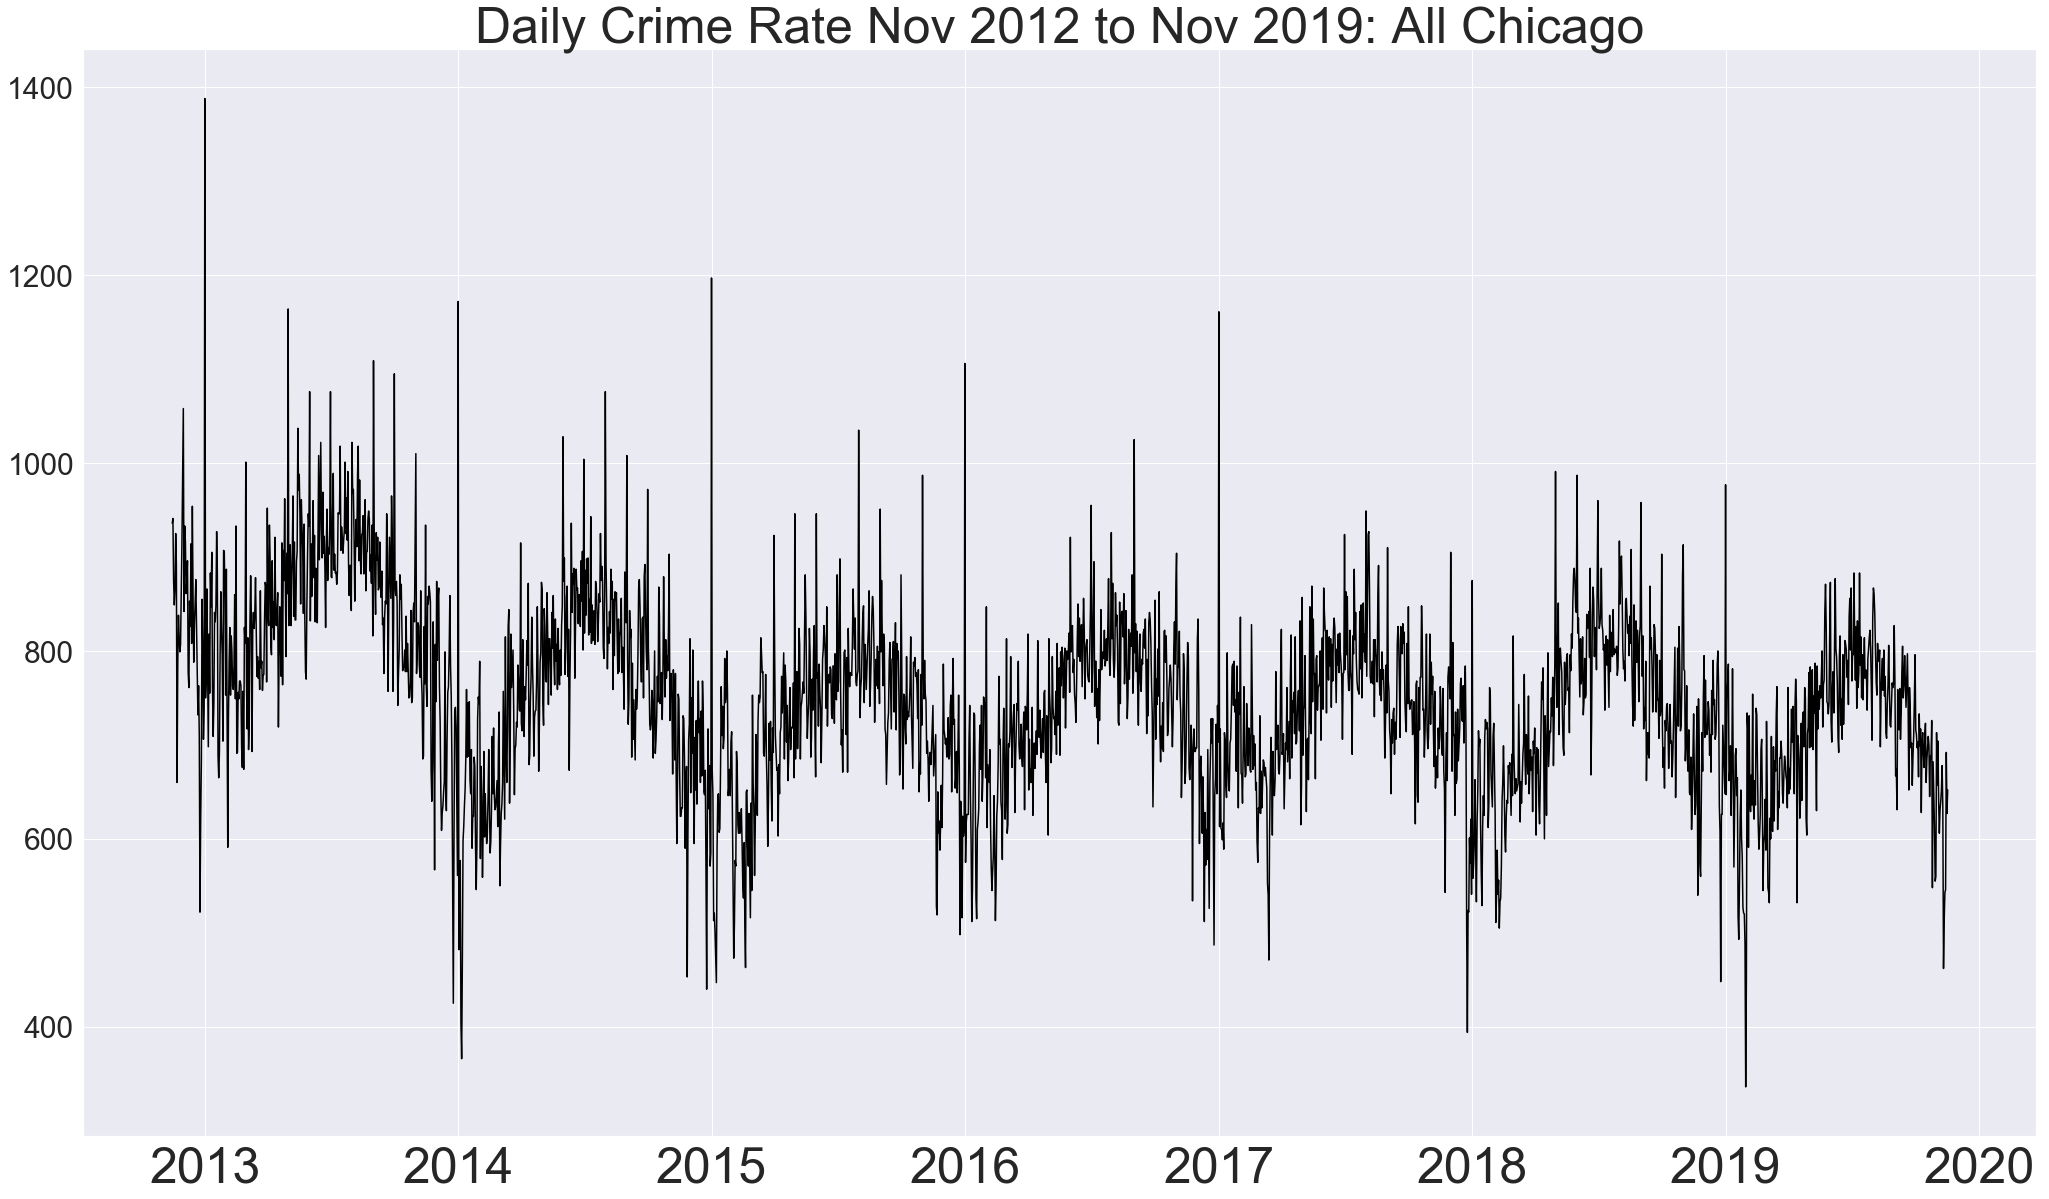

In [10]:
fig = plt.figure(figsize= (35, 20))
ax = fig.add_subplot(1,1,1)
plt.plot(df_daily_crime.index, df_daily_crime[0], color= 'black')
ax.set_title('Daily Crime Rate Nov 2012 to Nov 2019: All Chicago', fontsize= 50)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(50)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(30)
plt.savefig('../assets/daily_crime_2012_2019_all_chicago.png')

### Seasonality is evident with lows on the yearly bookends and a peak in the summer.

### Higher absolute rates and greater variability marked 2013 and to a lessor degree 2014.   In 2015 rates shifted down, and with less variability also.   The years since then have been a more steady state existance.

In [11]:
df.head(1)

,date_col,id,case_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,beat,district,ward,community_area,fbi_code,year,updated_on,latitude,longitude,location,district_x,sector,beat_x,beat_num,district_name,weekday,fri_sat_sun,hour_of_day,summation_bit,first_of_month,first_week_from_first,second_week_from_first,last_week_from_end,second_to last_week_from_end,month,year_month
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2012-11-15 00:01:00,2012-11-15 00:01:00,8926266,HV598372,2012-11-15 00:01:00,013XX W CORNELIA AVE,0810,THEFT,OVER $500,APARTMENT,False,False,1924,19.0,44.0,6.0,06,2012,02/10/2018 03:50:01 PM,41.945267,-87.662672,"(41.945267201, -87.662671562)",19.0,2.0,2.0,1924.0,Town Hall,Thursday,0,0,1,0,0,0,0,0,11,2012-11


In [12]:
df_year = df[df['date_col'] >=  pd.to_datetime('2018-11-15')].resample('D').size().to_frame()

In [13]:
df_year.head(3)

,0
date,
2018-11-15,690
2018-11-16,733
2018-11-17,668


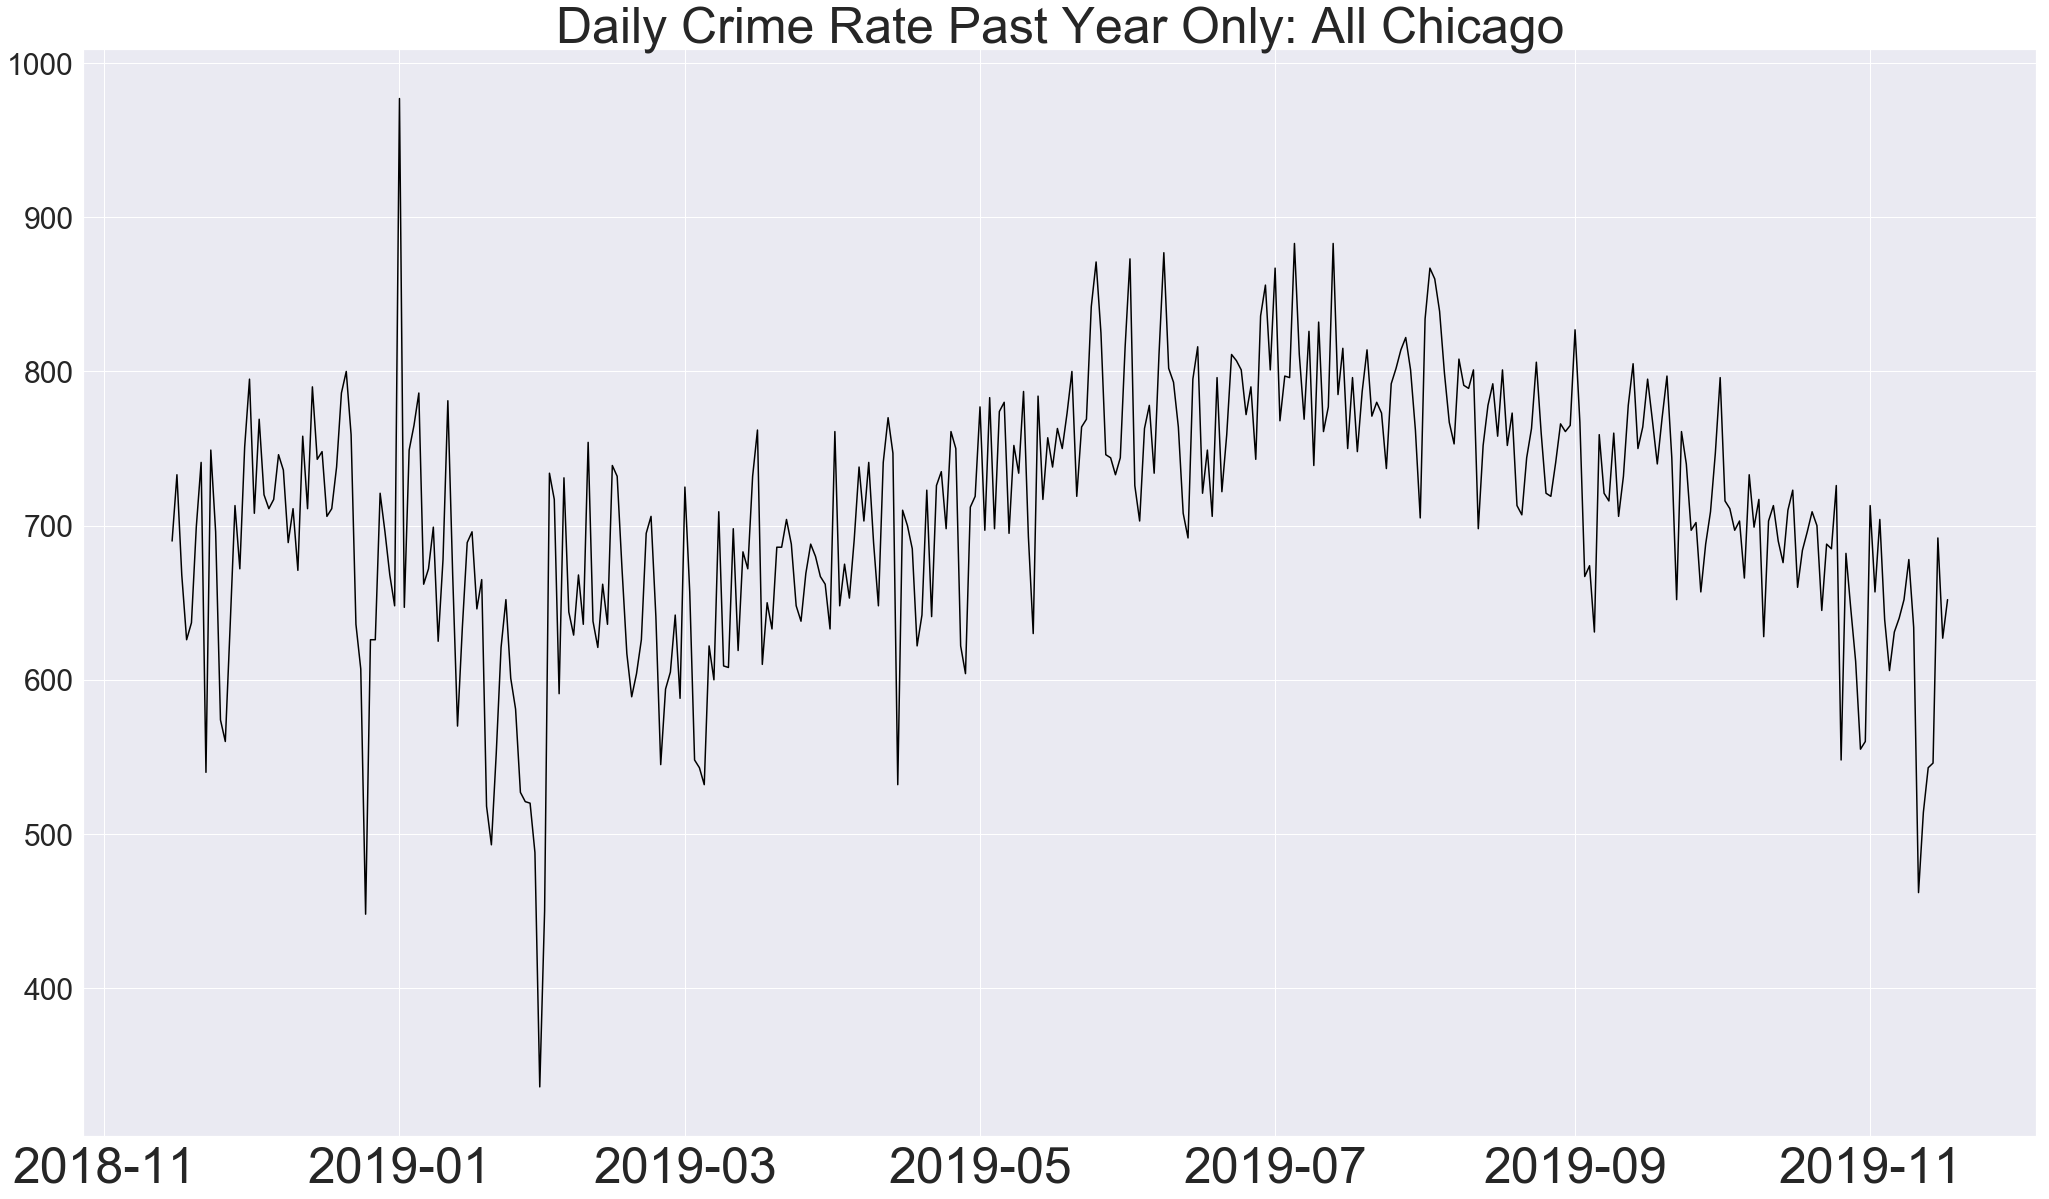

In [14]:
fig = plt.figure(figsize= (35, 20))
ax = fig.add_subplot(1,1,1)
plt.plot(df_year.index, df_year[0], color= 'black')
ax.set_title('Daily Crime Rate Past Year Only: All Chicago', fontsize= 50)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(50)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(30)
plt.savefig('../assets/daily_crime_past_year_all_chicago.png')

### Again the seasonality is evident.   The good news vis-a-vis the longer term plot is how the scale on the y-axis has scaled downward with a 1000 ceiling and tick-ascends in the 100s as opposed to the above plot's 200s !

## The seasonality by months  over a year strongly suggests some sort of monthly analysis.

#### Get deeper and dirtier with whole 7 year dataset instead of just eyeballing the dailys.

In [15]:
df_monthly_crime = df.groupby(['month']).sum()

In [16]:
df_monthly_crime.head()                        # summation bit like datatypes useful in avoiding multi-nested groupbys 
                                               #    where extracting values out some born-thru-groupby dataframes with 
                                               #    newly recursively nested indexes is an unholy mess;   in some
                                               #    uses needed for flagging/tagging here for quick summation

,id,arrest,domestic,beat,district,ward,community_area,year,latitude,longitude,district_x,sector,beat_x,beat_num,fri_sat_sun,hour_of_day,summation_bit,first_of_month,first_week_from_first,second_week_from_first,last_week_from_end,second_to last_week_from_end
month,,,,,,,,,,,,,,,,,,,,,,
1,1532263161139,36409.0,23159.0,171784825,1683773.0,3449412.0,5506996.0,300263116,6.162337e+06,-1.291150e+07,1683624.0,302571.0,302571.0,171784825.0,62798,1940415,148948,7876,34095,32911,33306,33975
2,1336069083333,34006.0,20173.0,149197161,1462359.0,2993535.0,4786939.0,260717288,5.376159e+06,-1.126438e+07,1462334.0,262011.0,262011.0,149197161.0,55754,1703128,129328,5370,32572,31823,31807,32575
3,1580496263918,39690.0,24656.0,174575227,1710895.0,3510345.0,5697015.0,308017505,6.353096e+06,-1.331169e+07,1710723.0,309562.0,309562.0,174575227.0,68634,2018839,152795,5574,33378,34360,34988,34716
4,1605938413382,38460.0,25197.0,176311553,1727647.0,3544584.0,5795704.0,312069000,6.427709e+06,-1.346820e+07,1727572.0,314049.0,314049.0,176311553.0,65439,2050229,154805,5910,35905,36005,36596,35803
5,1787024046573,41792.0,28154.0,194702081,1907795.0,3925120.0,6420473.0,345747844,7.125630e+06,-1.493061e+07,1907700.0,347310.0,347310.0,194702081.0,72825,2265642,171509,6421,38747,37648,39126,38847


In [17]:
crimes_by_month = df_monthly_crime['summation_bit']                # overall summation bit

In [18]:
crimes_by_month.shape

(12,)

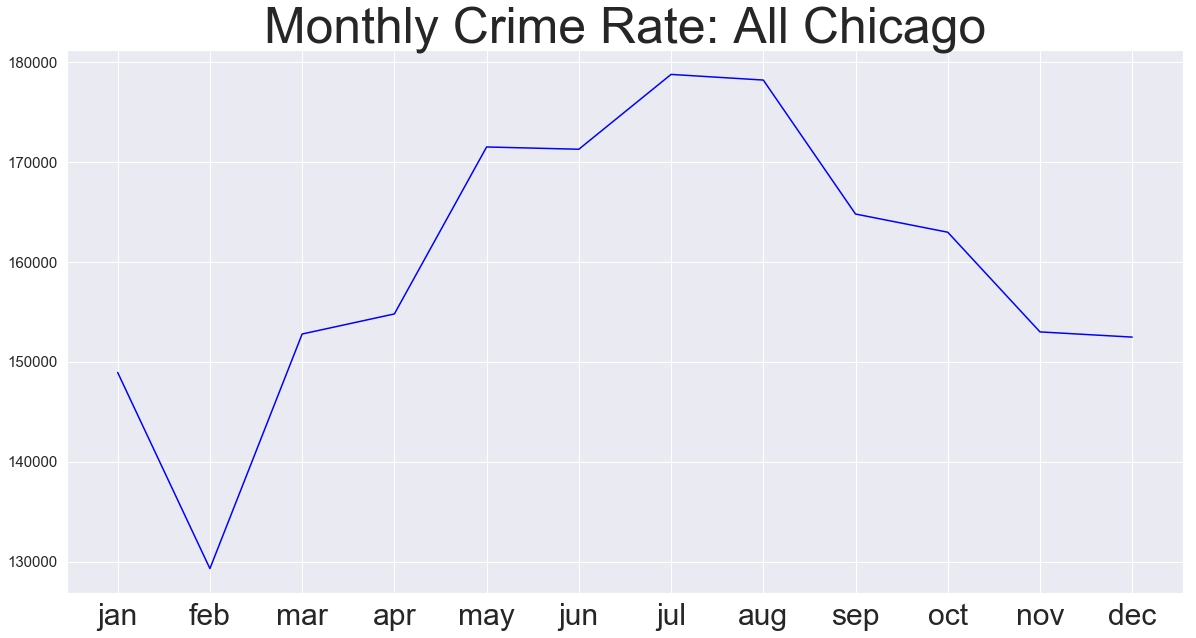

In [19]:
fig = plt.figure(figsize= (20, 10))
ax = fig.add_subplot(1,1,1)
plt.plot(months, list(crimes_by_month), color= 'blue')
ax.set_title('Monthly Crime Rate: All Chicago', fontsize= 50)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(30)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(15)
plt.savefig('../assets/monthly_crime_whole_dataset_all_chicago.png')

### With the monthly influence,  check the Fri-Sat-Sun influence on top of it

In [20]:
fss_crimes_by_month = df_monthly_crime['fri_sat_sun']      # summation-bit/flagger-tagger for Friday-Saturday-Sunday

In [21]:
fss_influence = fss_crimes_by_month / crimes_by_month

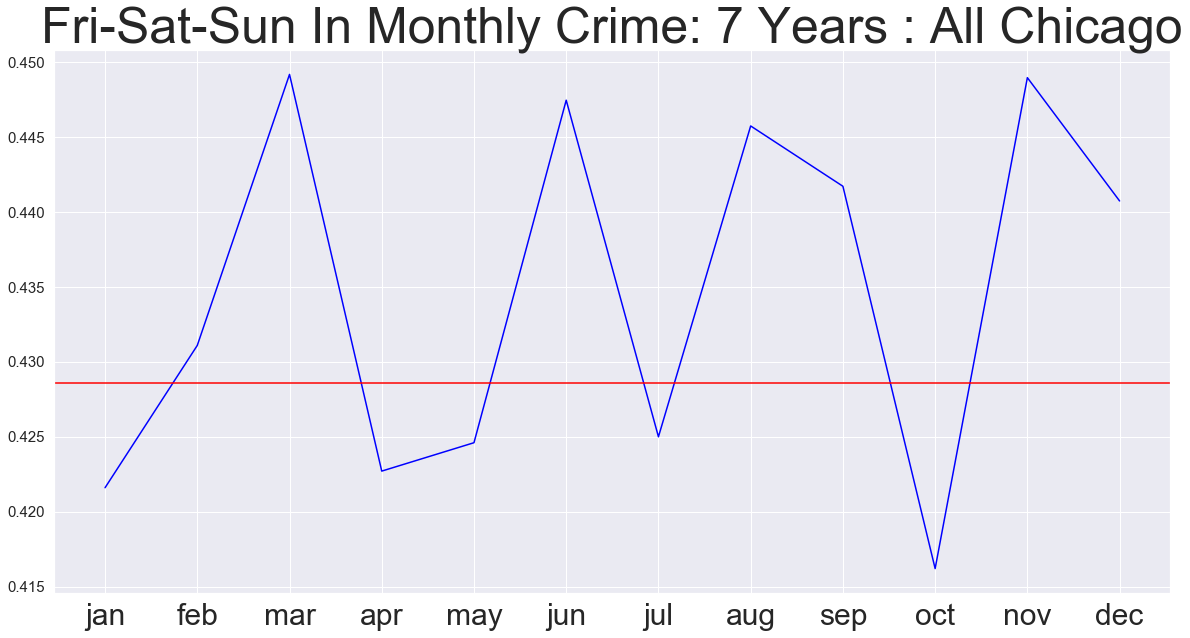

In [22]:
fig = plt.figure(figsize= (20, 10))
ax = fig.add_subplot(1,1,1)
plt.plot(months, list(fss_influence), color= 'blue')
plt.axhline(0.4286, color= 'red')
ax.set_title('Fri-Sat-Sun In Monthly Crime: 7 Years : All Chicago', fontsize= 50)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(30)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(15)
plt.savefig('../assets/monthly_crime_fri_sat_sun.png')

###  Fri-Sat-Sun rarely punches at weight;  sinusoidally almost changes with the baseline;  also, while average crime rates roughly make one cycle a year peaking in July,  Fri-Sat-Sun has additional sinusoidal like periods.  

#### Check the past year to see if this phenomenon still is around

In [23]:
df_past_year = df[df['date_col'] >= pd.to_datetime('2018-11-15')]
df_past_year_monthly_crime = df_past_year.groupby(['month']).sum()

past_year_crimes_by_month     = df_past_year_monthly_crime['summation_bit'] 
fss_past_year_crimes_by_month = df_past_year_monthly_crime['fri_sat_sun'] 

fss_past_year_influence = fss_past_year_crimes_by_month / past_year_crimes_by_month

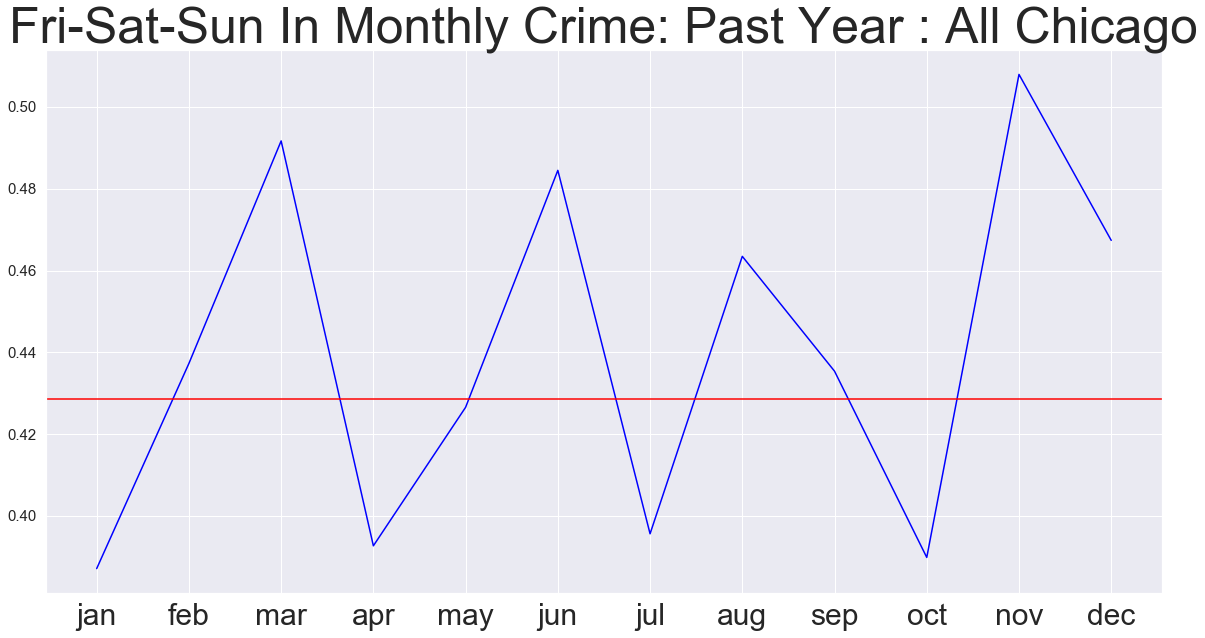

In [24]:
fig = plt.figure(figsize= (20, 10))
ax = fig.add_subplot(1,1,1)
plt.plot(months, list(fss_past_year_influence), color= 'blue')
plt.axhline(0.4286, color= 'red')
ax.set_title('Fri-Sat-Sun In Monthly Crime: Past Year : All Chicago', fontsize= 50)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(30)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(15)

plt.savefig('../assets/monthly_crime_past_year__fri_sat_sun.png')

## As crime rates have initially very gradually come down some from 2013 to 2015 and have become essentially steady state since,  the influence of Fri-Sat-Sun has become more pronounced.  Wilder spreads now versus the longer term average.  

##### At peaks accounts for roughly half,  with,  remember from previously,  a much larger percentage than normal being violent.

## Pick up workflow in the next notebook.

In [25]:
df.to_csv('../data/df_4.csv', index= False)